In [1]:
#!pip install keras
import pandas as pd
import numpy as np
import keras
import math

/Users/liuboyang/tutorial/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/liuboyang/tutorial/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
train = pd.read_csv("Sample10_click179.csv")

In [3]:
train.shape

(244712, 127)

In [4]:
Samp_per=0.0675
df1 = train[train['click']==1]
df0 = train[train['click']==0]
df2=df0.sample(frac=Samp_per)
combined_df = pd.concat([df1, df2],axis=0)

In [5]:
train = combined_df

In [6]:
valid = pd.read_csv("../desktop/valid_newfeature.csv")

In [7]:
valid.head()

,click,slotwidth,slotheight,slotprice,android,ios,linux,mac,other,windows,...,slotformat_Na,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,advertiser_3358,advertiser_3386,advertiser_3427,advertiser_3476
0,0,160,600,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,950,90,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,300,250,5,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,336,280,5,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,200,200,5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [8]:
test = pd.read_csv("../desktop/mytestset.csv")

In [9]:
test.head()

,slotwidth,slotheight,slotprice,10006,10024,10031,10048,10052,10057,10059,...,slotformat_Na,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,advertiser_3358,advertiser_3386,advertiser_3427,advertiser_3476
0,300,250,10,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,320,50,5,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,336,280,0,1,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,960,90,30,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,300,250,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
test = test[['slotwidth', 'slotheight', 'slotprice', 'android', 'ios',
       'linux', 'mac', 'other', 'windows', 'chrome', 'firefox', 'ie',
       'maxthon', 'opera', 'other.1', 'safari', 'sogou', 'theworld',
       '10006', '10024', '10031', '10048', '10052', '10057', '10059',
       '10063', '10067', '10074', '10075', '10076', '10077', '10079',
       '10083', '10093', '10102', '10110', '10111', '10114', '10115',
       '10116', '10117', '10118', '10120', '10123', '10125', '10126',
       '10127', '10129', '10130', '10131', '10133', '10138', '10140',
       '10142', '10145', '10146', '10147', '10148', '10149', '10684',
       '11092', '11278', '11379', '11423', '11512', '11576', '11632',
       '11680', '11724', '11944', '13042', '13403', '13496', '13678',
       '13776', '13800', '13866', '13874', '14273', '15398', '16593',
       '16617', '16661', '16706', '16751', '16753', 'hour_sin', 'hour_cos',
       'city_per', 'region_per', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'adexchange_1.0', 'adexchange_2.0', 'adexchange_3.0',
       'adexchange_4.0', 'adexchange_nan', 'slotvisibility_0',
       'slotvisibility_1', 'slotvisibility_2', 'slotvisibility_255',
       'slotvisibility_FifthView', 'slotvisibility_FirstView',
       'slotvisibility_FourthView', 'slotvisibility_Na',
       'slotvisibility_OtherView', 'slotvisibility_SecondView',
       'slotvisibility_ThirdView', 'slotformat_0', 'slotformat_1',
       'slotformat_5', 'slotformat_Na', 'advertiser_1458',
       'advertiser_2259', 'advertiser_2261', 'advertiser_2821',
       'advertiser_2997', 'advertiser_3358', 'advertiser_3386',
       'advertiser_3427', 'advertiser_3476']]

In [11]:
test.head()

,slotwidth,slotheight,slotprice,android,ios,linux,mac,other,windows,chrome,...,slotformat_Na,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,advertiser_3358,advertiser_3386,advertiser_3427,advertiser_3476
0,300,250,10,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,320,50,5,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,336,280,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,960,90,30,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,300,250,50,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
train_x = train.as_matrix()[:,1:]
train_x.shape

(18190, 126)

In [13]:
train_y = train.as_matrix()[:,0]
train_y.shape

(18190,)

In [14]:
train_x = np.expand_dims(train_x, axis = 1)

In [15]:
train_x.shape

(18190, 1, 126)

In [16]:
def create_class_weight(trainY,mu=2.2):
    total = len(train['click'])
    keys = train['click'].unique()
    class_weight = dict()
    for key in keys:
        score = math.log(mu*total/float(train['click'].value_counts()[key]))
        class_weight[key] = score if score > 1.0 else 1.0
    return class_weight
train_class_weight=create_class_weight(train)
print(train_class_weight)

{1: 3.105439158271305, 0: 1.0}


In [17]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.optimizers import SGD,Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Convolution1D, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [18]:
input_dim=len(train.columns)-1

In [19]:
model = Sequential()
#model.add(Dense(output_dim = 2, input_dim=len(train.columns)-1, activation='softmax'))
model.add(Convolution1D(nb_filter = 64,
                       filter_length = 3,
                       border_mode='same',
                       activation='relu',
                       input_shape=(1,input_dim),
                       ))
model.add(GlobalMaxPooling1D())
model.add(Dense(250))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(output_dim = 2, input_dim=input_dim, activation='softmax'))

#optimizer = SGD(lr = 0.003, momentum = 0.9, decay = 0.0, nesterov = True)
optimizer=Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1, 64)             24256     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               16250     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 502       
Total params: 41,008
Trainable params: 41,008
Non-trainable params: 0
_________________________________________________________________


/Users/liuboyang/tutorial/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(1, 126), filters=64, kernel_size=3, padding="same")`
  import sys
/Users/liuboyang/tutorial/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=126, activation="softmax", units=2)`
  del sys.path[0]


In [20]:
MODEL_CHECKPOINT_FILE_PATH="Keras-CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=MODEL_CHECKPOINT_FILE_PATH, verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', patience=2, verbose=0)

In [21]:
valid_x = valid.as_matrix()[:,1:]
valid_y = valid.as_matrix()[:,0]

In [22]:
valid_x = np.expand_dims(valid_x, axis = 1)
valid_x.shape

(303925, 1, 126)

In [23]:
model.fit(train_x, to_categorical(train_y), nb_epoch=30, batch_size=32, 
         validation_data = (valid_x, to_categorical(valid_y)),
          class_weight=train_class_weight,
         callbacks=[checkpointer,earlystopper])

/Users/liuboyang/tutorial/lib/python3.6/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 18190 samples, validate on 303925 samples
Epoch 1/30
18190/18190 [==============================] - 8s 448us/step - loss: 1.7096 - acc: 0.8229 - val_loss: 0.2723 - val_acc: 0.9864
Epoch 2/30
18190/18190 [==============================] - 8s 425us/step - loss: 0.6747 - acc: 0.8838 - val_loss: 0.1938 - val_acc: 0.9894
Epoch 3/30
18190/18190 [==============================] - 8s 434us/step - loss: 0.6347 - acc: 0.8875 - val_loss: 0.4434 - val_acc: 0.9410
Epoch 4/30
18190/18190 [==============================] - 8s 435us/step - loss: 0.6128 - acc: 0.8909 - val_loss: 0.1894 - val_acc: 0.9754
Epoch 5/30
18190/18190 [==============================] - 8s 450us/step - loss: 0.5963 - acc: 0.8885 - val_loss: 0.2111 - val_acc: 0.9670
Epoch 6/30
18190/18190 [==============================] - 8s 434us/step - loss: 0.5799 - acc: 0.8922 - val_loss: 0.3754 - val_acc: 0.8979


In [24]:
def load_trained_model(weights_path):
    #model = create_model()
    model.load_weights(weights_path)
load_trained_model(MODEL_CHECKPOINT_FILE_PATH)

In [25]:
# valid_x = valid.as_matrix()[:,1:]
# valid_y = valid.as_matrix()[:,0]
loss_and_metrics = model.evaluate(valid_x, to_categorical(valid_y), batch_size=128)
loss_and_metrics

303925/303925 [==============================] - 3s 9us/step


[0.18937963063959876, 0.9754018261109644]

In [26]:
test_x = test.as_matrix()
test_x.shape

(303375, 126)

In [27]:
test_x = np.expand_dims(test_x, axis = 1)
test_x.shape

(303375, 1, 126)

In [28]:
classes = model.predict(test_x, batch_size=128)
classes.shape

(303375, 2)

In [29]:
sum(to_categorical(train_y)[:,1])

1793.0

In [30]:
sum(to_categorical(valid_y)[:,1])

202.0

In [31]:
sum(classes[:,1])

49604.44030442275

In [32]:
classes

array([[0.9074407 , 0.09255926],
       [0.4040434 , 0.59595656],
       [0.9510008 , 0.0489992 ],
       ...,
       [0.85035366, 0.14964633],
       [0.8390829 , 0.16091712],
       [0.87091976, 0.12908022]], dtype=float32)

In [33]:
prob = model.predict_proba(valid_x)

303925/303925 [==============================] - 6s 20us/step


In [34]:
sum(prob[:,1])

49827.403171834536

In [35]:
prob

array([[0.81883514, 0.18116488],
       [0.88441646, 0.11558351],
       [0.9565882 , 0.0434118 ],
       ...,
       [0.8338525 , 0.16614754],
       [0.8668632 , 0.1331368 ],
       [0.83637726, 0.1636227 ]], dtype=float32)

In [36]:
classes = np.argmax(prob, -1)

In [37]:
classes

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
sum(classes)

7362

In [39]:
valid_result = pd.DataFrame(columns=['click', 'click_pred_per', 'click_pred_class'])  
valid_result['click']= valid['click'].copy()
valid_result['click_pred_per'] = prob[:,1]
valid_result['click_pred_class'] = classes
valid_result.head()

,click,click_pred_per,click_pred_class
0,0,0.181165,0
1,0,0.115584,0
2,0,0.043412,0
3,0,0.044431,0
4,0,0.134338,0


In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


y_test = valid_result['click']
y_pred_class = valid_result['click_pred_class']

print(confusion_matrix(y_test, y_pred_class))

confusion = confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)

#准确率、识别率（Classification Accuracy）：分类器正确分类的比例
#print ((TP+TN) / float(TP+TN+FN+FP))
print ("Accuracy: %.6f%%" % (accuracy_score(y_test, y_pred_class)* 100.0) )

#灵敏性（Sensitivity），也称为真正例识别率、召回率（Recall）：正确识别的正例数据在实际正例数据中的百分比
#print (TP / float(TP+FN))
#recall = metrics.recall_score(y_test, y_pred_class)
print ("Recall: %.6f%%" % (recall_score(y_test, y_pred_class)* 100.0))

#特效性（Specificity），也称为真负例率：正确识别的负例数据在实际负例数据中的百分比
print ("Specificity: %.6f%%" % (TN / float(TN+FP)* 100.0))

#假阳率（False Positive Rate）：实际值是负例数据，预测错误的百分比
#print (FP / float(TN+FP))
specificity = TN / float(TN+FP)
print ("False Positive Rate: %.6f%%" %((1 - specificity)*100.0))

#精度（Precision）：看做精确性的度量，即标记为正类的数据实际为正例的百分比
#print (TP / float(TP+FP))
precision = precision_score(y_test, y_pred_class)
print ("Precision: %.6f%%" %(precision*100.0))

#F1（平衡F分数）：精确率和召回率的调和平均数
#print (TP / float(TP+FP))
f1 = f1_score(y_test, y_pred_class)
print ("F1 score: %.6f%%" %(f1*100.0))




[[296405   7318]
 [   158     44]]
TP: 44
TN: 296405
FP: 7318
FN: 158
Accuracy: 97.540183%
Recall: 21.782178%
Specificity: 97.590568%
False Positive Rate: 2.409432%
Precision: 0.597664%
F1 score: 1.163406%


In [41]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt


# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_ROC_curve(data, prediction):
    """
    Function to plot the ROC curve with AUC.
    """

    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(data, prediction)
    roc_auc = roc_auc_score(data, prediction)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    #plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC curve for CTR')
    plt.grid(True)
    plt.legend(loc="lower right")
    
    return

the AUC for FM is: 0.777592


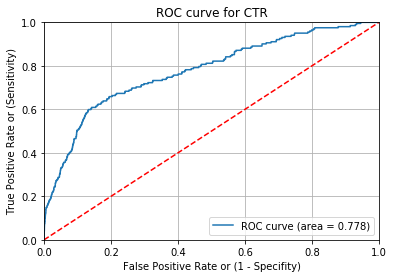

In [42]:
plot_ROC_curve(valid_result['click'], valid_result['click_pred_per'])
#xgboost的auc
print ("the AUC for FM is: {0:6f}".format(roc_auc_score(valid_result['click'], valid_result['click_pred_per'])))

In [43]:
df_valid = pd.read_csv("../desktop/we_data/validation.csv")

In [44]:
# parameters
total_budget = 6250000
payprice = df_valid['payprice'].as_matrix()
Train_df_qr = df_valid.copy()
test_predictions=valid_result['click_pred_per']
#test_predictions1=test_result['click_pred_per']

avgCTR = 1793/2430981 #train set
#tuning...

In [45]:
def generate_bidprice(base_bid, test_predictions):
    avgCTR = 1793/2430981#train set
    bidprices = base_bid*test_predictions/avgCTR
    return bidprices

In [46]:
def Prob3(Train_df,payprice,base_bid,test_predictions):
    Train_Const_summ = pd.DataFrame({'Clicks':'', 'Spend':'', 'CTR':'', 'CPM':'', 'eCPC':''}, index=[0])
    
    #if count_break = 5 break
    count_break = 0
    
    current_budget = total_budget
    Train_df['win'] = 0 #initialize win label
    bidprices = generate_bidprice(base_bid, test_predictions)
    #start biding...
    for i in Train_df.index:
    #for i in range(Train_df.shape[0]):
#         if current_budget >= bidprices[i]:
#         if current_budget > 0:
            #generate bidprice:
        current_bidprice = bidprices[i]
        #consider budget
        if current_budget <= current_bidprice:              
            #count lack budget times
            count_break = count_break + 1
            print('lack of budget!',"current_budget:",current_budget,";current_bidprice:",current_bidprice,';count_break:',count_break)
            if count_break > 5:
                break  
            #reset bidprice
            current_bidprice = current_budget
        else:
            count_break = 0
            

        #Winning criterion:
        current_payprice = payprice[i]
        if current_bidprice > current_payprice:
            Train_df.at[i, 'win'] = int(1)
            current_budget = current_budget - current_payprice
        else:
            Train_df.at[i, 'win'] = int(0)

    #biding end        
    
    Train_df_new = Train_df[Train_df['win']!=0]
    #wintimes,_ = Train_df_new.shape
    #print('wintimes:',wintimes)
    #print('current_budget',current_budget)

    Clk = Train_df_new['click'].sum()
    Imp = Train_df_new['click'].count()
    CTR = Clk/Imp
    Spd = total_budget - current_budget
    CPM = 1000*Spd/Imp
    eCPC = Spd/Clk
    
    Train_Const_summ.loc[0,'Clicks']=Clk
    Train_Const_summ.loc[0,'Spend']=Spd
    Train_Const_summ.loc[0,'CTR']=CTR
    Train_Const_summ.loc[0,'CPM']=CPM
    Train_Const_summ.loc[0,'eCPC']=eCPC

    print(Train_Const_summ)
    
        
    return Train_df,current_budget

In [47]:
def calculate_click(base_bid,Train_df,payprice,test_predictions):
    print('base_bid:',base_bid)
    result_df,current_budget = Prob3(Train_df,payprice,base_bid,test_predictions)
    print('current_budget:',current_budget)
    Train_df_new = result_df[result_df['win']!=0]
    wintimes,_ = Train_df_new.shape
    print('wintimes:',wintimes)
    print('----------------')
    Clk = Train_df_new['click'].sum()    
    return Clk

In [48]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import mpld3
import numpy as np

In [49]:
base_bids = np.arange(115,137,1)#区间可以适当左右调整一下，但大概就是这个范围
Clks = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions) for base_bid in base_bids]
fig = plt.figure()
print(max(Clks))
plt.plot(base_bids,Clks)
mpld3.display(fig)

base_bid: 115
lack of budget! current_budget: 104225 ;current_bidprice: 138569.48 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 97765.41 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 112332.82 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 126482.72 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 95266.95 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 92079.69 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 90736.164 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 111210.62 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 95159.47 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 107819.82 ;count_break: 1
lack of budget! current_budget: 73669 ;current_bidprice: 93026.03 ;count_break: 1
lack of budget! current_budget: 69250 ;current_bidprice: 113342.91 ;count_bre

lack of budget! current_budget: 104225 ;current_bidprice: 140979.38 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 99465.68 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 114286.43 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 128682.414 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 96923.77 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 93681.07 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 92314.195 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 113144.7 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 96814.414 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 109694.95 ;count_break: 1
lack of budget! current_budget: 73669 ;current_bidprice: 94643.875 ;count_break: 1
lack of budget! current_budget: 69250 ;current_bidprice: 115314.09 ;count_break: 1
lack o

lack of budget! current_budget: 120873 ;current_bidprice: 120873.516 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 143389.3 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 101165.945 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 116240.05 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 130882.12 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 98580.59 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 95282.45 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 93892.21 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 115078.81 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 98469.36 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 111570.08 ;count_break: 1
lack of budget! current_budget: 73669 ;current_bidprice: 96261.72 ;count_break: 1
lack o

lack of budget! current_budget: 120873 ;current_bidprice: 122905.01 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 145799.19 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 102866.21 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 118193.664 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 133081.83 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 100237.41 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 96883.84 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 95470.234 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 117012.9 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 100124.305 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 113445.2 ;count_break: 1
lack of budget! current_budget: 73669 ;current_bidprice: 97879.56 ;count_break: 1
lack

lack of budget! current_budget: 120873 ;current_bidprice: 124936.49 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 148209.1 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 104566.484 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 120147.28 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 135281.52 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 101894.22 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 98485.23 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 97048.25 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 118947.01 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 101779.26 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 115320.336 ;count_break: 1
lack of budget! current_budget: 73669 ;current_bidprice: 99497.41 ;count_break: 1
lack

lack of budget! current_budget: 120873 ;current_bidprice: 125952.234 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 149414.05 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 105416.61 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 121124.086 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 136381.38 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 102722.63 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 99285.92 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 97837.266 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 119914.05 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 102606.73 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 116257.9 ;count_break: 1
lack of budget! current_budget: 73669 ;current_bidprice: 100306.336 ;count_break: 1
l

lack of budget! current_budget: 120873 ;current_bidprice: 126967.984 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 150619.0 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 106266.75 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 122100.89 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 137481.22 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 103551.04 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 100086.62 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 98626.266 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 120881.09 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 103434.2 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 117195.46 ;count_break: 1
lack of budget! current_budget: 73669 ;current_bidprice: 101115.25 ;count_break: 1
lac

lack of budget! current_budget: 120873 ;current_bidprice: 127983.72 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 151823.95 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 107116.89 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 123077.7 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 138581.06 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 104379.445 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 100887.305 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 99415.28 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 121848.16 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 104261.68 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 118133.016 ;count_break: 1
lack of budget! current_budget: 73669 ;current_bidprice: 101924.17 ;count_break: 1
l

       CPM          CTR Clicks    Spend    eCPC
0  78422.7  0.000642398     51  6225977  122078
current_budget: 24023
wintimes: 79390
----------------
base_bid: 127
lack of budget! current_budget: 120873 ;current_bidprice: 128999.46 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 153028.9 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 107967.016 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 124054.5 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 139680.9 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 105207.86 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 101688.0 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 100204.29 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 122815.2 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 105089.15 ;count_break: 1
lack of

lack of budget! current_budget: 120873 ;current_bidprice: 130015.21 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 154233.86 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 108817.15 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 125031.31 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 140780.77 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 106036.266 ;count_break: 1
lack of budget! current_budget: 88425 ;current_bidprice: 88584.0 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 102488.695 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 100993.305 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 123782.24 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 105916.625 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 120008.15 ;count_break: 1


base_bid: 129
lack of budget! current_budget: 120873 ;current_bidprice: 131030.95 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 155438.81 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 109667.29 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 126008.125 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 141880.62 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 106864.664 ;count_break: 1
lack of budget! current_budget: 88425 ;current_bidprice: 89276.06 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 103289.38 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 101782.32 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 124749.29 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 106744.09 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 120945.72 ;co

base_bid: 130
lack of budget! current_budget: 120873 ;current_bidprice: 132046.7 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 156643.75 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 110517.414 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 126984.92 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 142980.47 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 107693.086 ;count_break: 1
lack of budget! current_budget: 88425 ;current_bidprice: 89968.13 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 104090.08 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 102571.32 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 125716.336 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 107571.57 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 121883.28 ;co

lack of budget! current_budget: 120873 ;current_bidprice: 133062.44 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 157848.72 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 111367.555 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 127961.734 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 144080.31 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 108521.484 ;count_break: 1
lack of budget! current_budget: 88425 ;current_bidprice: 90660.19 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 104890.77 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 103360.336 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 126683.4 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 108399.05 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 122820.836 ;count_break: 1

lack of budget! current_budget: 120873 ;current_bidprice: 134078.19 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 159053.67 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 112217.695 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 128938.54 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 145180.16 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 109349.89 ;count_break: 1
lack of budget! current_budget: 88425 ;current_bidprice: 91352.25 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 105691.46 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 104149.336 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 127650.44 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 109226.516 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 123758.41 ;count_break: 1


lack of budget! current_budget: 120873 ;current_bidprice: 135093.92 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 160258.61 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 113067.82 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 129915.34 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 146280.02 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 110178.305 ;count_break: 1
lack of budget! current_budget: 88425 ;current_bidprice: 92044.305 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 106492.16 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 104938.35 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 128617.484 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 110053.99 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 124695.97 ;count_break: 1


lack of budget! current_budget: 120873 ;current_bidprice: 136109.67 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 161463.58 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 113917.95 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 130892.16 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 147379.88 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 111006.71 ;count_break: 1
lack of budget! current_budget: 88425 ;current_bidprice: 92736.375 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 107292.85 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 105727.37 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 129584.55 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 110881.47 ;count_break: 1
lack of budget! current_budget: 79104 ;current_bidprice: 125633.53 ;count_break: 1
la

lack of budget! current_budget: 136642 ;current_bidprice: 136862.23 ;count_break: 1
lack of budget! current_budget: 120873 ;current_bidprice: 137125.4 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 162668.53 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 114768.09 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 131868.95 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 148479.72 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 111835.12 ;count_break: 1
lack of budget! current_budget: 88425 ;current_bidprice: 93428.44 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 108093.55 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 106516.375 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 130551.59 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 111708.94 ;count_break: 1
la

lack of budget! current_budget: 136642 ;current_bidprice: 137876.03 ;count_break: 1
lack of budget! current_budget: 120873 ;current_bidprice: 138141.16 ;count_break: 1
lack of budget! current_budget: 104225 ;current_bidprice: 163873.47 ;count_break: 1
lack of budget! current_budget: 91958 ;current_bidprice: 115618.22 ;count_break: 1
lack of budget! current_budget: 91024 ;current_bidprice: 132845.77 ;count_break: 1
lack of budget! current_budget: 89998 ;current_bidprice: 149579.56 ;count_break: 1
lack of budget! current_budget: 89813 ;current_bidprice: 112663.53 ;count_break: 1
lack of budget! current_budget: 88425 ;current_bidprice: 94120.5 ;count_break: 1
lack of budget! current_budget: 87611 ;current_bidprice: 108894.234 ;count_break: 1
lack of budget! current_budget: 84154 ;current_bidprice: 107305.39 ;count_break: 1
lack of budget! current_budget: 83820 ;current_bidprice: 131518.64 ;count_break: 1
lack of budget! current_budget: 79501 ;current_bidprice: 112536.414 ;count_break: 1
l